# a.iris資集介紹

## 匯入模組

In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)
import matplotlib.pyplot as plt
import os
print(os.listdir('./input'))
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder #labelEncoder
from sklearn.preprocessing import OneHotEncoder #one-hot-code
from sklearn.model_selection import train_test_split #將X與Y隨機切成訓練與測試

Using TensorFlow backend.


['Iris.csv']


## 讀取Iris.csv資料

In [2]:
all_df = pd.read_csv('./input/Iris.csv')

In [3]:
all_df

,petal_length,petal_width,sepal_length,sepal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 選取欄位到dataframe

In [4]:
cols=['petal_length','petal_width','sepal_length','sepal_width','label']
all_df=all_df[cols]

In [5]:
all_df

,petal_length,petal_width,sepal_length,sepal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
#df.describe()

# b.資料預處理

In [7]:
all_df['label']=all_df['label'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}).astype(int) #先將label轉成int

In [8]:
df=all_df
df

,petal_length,petal_width,sepal_length,sepal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
ndarray = df.values #將df轉成array

In [10]:
ndarray.shape

(150, 5)

In [11]:
ndarray[:2] #查看前2筆

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ]])

In [12]:
Label = ndarray[:,4]    #類別
Features = ndarray[:,:4] #前4筆是特徵

In [13]:
x_train, x_test, y_train, y_test = train_test_split(Features, Label, test_size=0.3, random_state=42) #分割資料

In [14]:
minmax_scale = preprocessing.MinMaxScaler(feature_range = (0, 1)) #建立MinMaxScaler標準化刻度minmax_scale

In [15]:
x_train_normalize = minmax_scale.fit_transform(x_train) #使用minmax_scale.fit_transform 將x訓練資料 進行標準化

In [16]:
x_test_normalize = minmax_scale.fit_transform(x_test) #使用minmax_scale.fit_transform 將x測試資料 進行標準化

In [17]:
y_train_onehot=np_utils.to_categorical(y_train) #將y訓練資料轉成one-hot-code

In [18]:
y_test_onehot=np_utils.to_categorical(y_test) #將y測試資料轉成one-hot-code

In [19]:
print('total:', len(df),
      'train:', len(x_train),
      'test:', len(x_test))

total: 150 train: 105 test: 45


# c.建立模型

## 匯入模組

In [20]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [21]:
model = Sequential() #建立keras Sequential模型

In [22]:
model.add(Dense(units=320, input_dim=4,        #建立輸入層與隱藏層1
                kernel_initializer='uniform',
                activation='relu'))

In [23]:
model.add(Dense(units=70,                     #建立隱藏層2
                kernel_initializer='uniform',
                activation='relu'))

model.add(Dense(units=60,                     #建立隱藏層2
                kernel_initializer='uniform',
                activation='relu'))

In [24]:
model.add(Dense(units=10,                     #建立隱藏層3
                kernel_initializer='uniform',
                activation='relu'))

In [25]:
model.add(Dense(units=3,                      #建立輸出層
                kernel_initializer='uniform',
                activation='softmax'))

In [26]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 320)               1600      
_________________________________________________________________
dense_2 (Dense)              (None, 70)                22470     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                710       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 33        
Total params: 24,813
Trainable params: 24,813
Non-trainable params: 0
_________________________________________________________________
None


# d.訓練模型

In [27]:
model.compile(loss='binary_crossentropy',              #定義訓練方式
              optimizer='adam', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [28]:
train_history = model.fit(x=x_train_normalize,
                          y=y_train_onehot,
                          validation_split=0.1,    #90%作為訓練資料，10%作為測試資料
                          epochs=76,               #執行48次訓練週期
                          batch_size=32,verbose=2) #每一批次32筆資料




Train on 94 samples, validate on 11 samples
Epoch 1/76





 - 2s - loss: 0.6365 - acc: 0.6667 - val_loss: 0.6361 - val_acc: 0.6667
Epoch 2/76
 - 0s - loss: 0.6364 - acc: 0.6667 - val_loss: 0.6359 - val_acc: 0.6667
Epoch 3/76
 - 0s - loss: 0.6362 - acc: 0.6667 - val_loss: 0.6356 - val_acc: 0.6667
Epoch 4/76
 - 0s - loss: 0.6360 - acc: 0.6667 - val_loss: 0.6352 - val_acc: 0.6667
Epoch 5/76
 - 0s - loss: 0.6356 - acc: 0.6667 - val_loss: 0.6347 - val_acc: 0.6667
Epoch 6/76
 - 0s - loss: 0.6351 - acc: 0.6667 - val_loss: 0.6339 - val_acc: 0.6667
Epoch 7/76
 - 0s - loss: 0.6342 - acc: 0.6667 - val_loss: 0.6326 - val_acc: 0.6667
Epoch 8/76
 - 0s - loss: 0.6330 - acc: 0.6667 - val_loss: 0.6309 - val_acc: 0.6667
Epoch 9/76
 - 0s - loss: 0.6311 - acc: 0.6667 - val_loss: 0.6285 - val_acc: 0.6667
Epoch 10/76
 - 0s - loss: 0.6286 - acc: 0.6667 - val_loss: 0.6252 - val_acc: 0.6667
Epoch 11/76
 - 0s - loss: 0.6252 - acc: 0.6667 - val_loss: 0.6207 - val_acc: 0.6667
Epoch 12/76
 - 0s - loss: 0.6203 

# e.以圖形顯示訓練過程的loss & accuracy

In [29]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

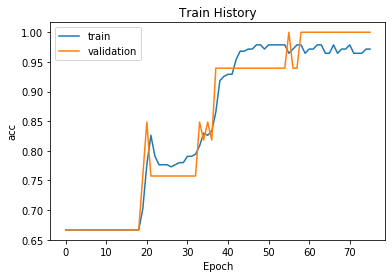

In [30]:
show_train_history(train_history, 'acc', 'val_acc') #畫出accuracy執行結果

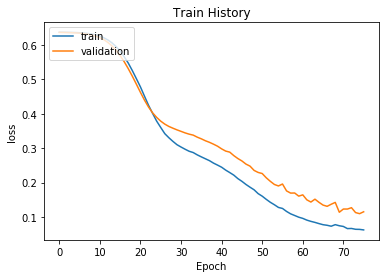

In [31]:
show_train_history(train_history, 'loss', 'val_loss') #畫出loss誤差執行結果

# f.評估模型準確率

In [32]:
scores = model.evaluate(x=x_test_normalize, #評估模型準確率
                        y=y_test_onehot)
print('accuracy=', scores[1]) #顯示準確率

45/45 [==============================] - 0s 133us/step
accuracy= 0.9703703986273872


# g.進行預測

In [33]:
prediction=model.predict_classes(x_test_normalize)
prediction

array([1, 0, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0], dtype=int64)

# h.混淆矩陣(Confusion matrix)

In [34]:
pd.crosstab(y_test, prediction,
            rownames=['label'], colnames=['predict'])

predict,0,1,2
label,,,
0.0,19,0,0
1.0,0,11,2
2.0,0,0,13


In [35]:
df1=pd.DataFrame({'label':y_test, 'predict':prediction})
df1

,label,predict
0,1.0,1
1,0.0,0
2,2.0,2
3,1.0,1
4,1.0,2
5,0.0,0
6,1.0,1
7,2.0,2
8,1.0,2
9,1.0,1
